In [ ]:
!gdown 1prPMgqX6TC31LNA-cz4-a1YOm2sHJzwj

Downloading...
From: https://drive.google.com/uc?id=1prPMgqX6TC31LNA-cz4-a1YOm2sHJzwj
To: /content/data_iqr.csv
100% 220k/220k [00:00<00:00, 6.49MB/s]


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.preprocessing   import StandardScaler

from sklearn.preprocessing   import OneHotEncoder
from sklearn.preprocessing   import LabelEncoder
from sklearn.utils           import resample
from sklearn.linear_model    import LogisticRegression
from sklearn.neighbors       import KNeighborsClassifier
from sklearn                 import tree
from sklearn.tree            import DecisionTreeClassifier
from sklearn.naive_bayes     import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm             import SVC
from sklearn.metrics         import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score, precision_score, recall_score,auc

In [ ]:
df = pd.read_csv('/content/data_iqr.csv')
df.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,Yes,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,2,...,3,1,0,8,1,1,6,4,0,5
1,1,49,No,Travel_Frequently,279,Research & Development,8.0,1,Life Sciences,3,...,4,4,1,10,3,3,10,7,1,7
2,2,37,Yes,Travel_Rarely,1373,Research & Development,2.0,2,Other,4,...,3,2,0,7,3,3,1,0,0,0
3,3,33,No,Travel_Frequently,1392,Research & Development,3.0,4,Life Sciences,4,...,3,3,0,8,3,3,8,7,3,0
4,4,27,No,Travel_Rarely,591,Research & Development,2.0,1,Medical,1,...,3,4,1,6,3,3,2,2,2,2


In [ ]:
le = LabelEncoder()

for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i])

In [ ]:
df.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,2,1102,2,1.0,2,1,2,...,3,1,0,8,1,1,6,4,0,5
1,1,49,0,1,279,1,8.0,1,1,3,...,4,4,1,10,3,3,10,7,1,7
2,2,37,1,2,1373,1,2.0,2,4,4,...,3,2,0,7,3,3,1,0,0,0
3,3,33,0,1,1392,1,3.0,4,1,4,...,3,3,0,8,3,3,8,7,3,0
4,4,27,0,2,591,1,2.0,1,3,1,...,3,4,1,6,3,3,2,2,2,2


In [ ]:
df = df.drop('Unnamed: 0', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int64  
 2   BusinessTravel            1470 non-null   int64  
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   int64  
 5   DistanceFromHome          1470 non-null   float64
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   int64  
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1470 non-null   int64  
 10  HourlyRate                1470 non-null   float64
 11  JobInvolvement            1470 non-null   int64  
 12  JobLevel                  1470 non-null   int64  
 13  JobRole                   1470 non-null   int64  
 14  JobSatis

In [ ]:
len(df[df['Attrition']==1])/len(df)

0.16122448979591836

In [ ]:
attrition_0 = df[df['Attrition']==0]
attrition_1 = df[df['Attrition']==1]
count_attrition_0 = len(attrition_0)
count_attrition_1 = len(attrition_1)

attrition_0_downsampled = resample(attrition_0, replace=False, n_samples=int(count_attrition_1*1.1), random_state=42)

df = pd.concat([attrition_0_downsampled, attrition_1])

In [ ]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
418,26,0,2,1349,1,23.0,3,1,1,0,...,4,2,2,3,3,1,3,2,0,2
643,42,0,2,1265,1,3.0,3,1,3,0,...,3,2,1,17,1,2,5,3,1,3
963,38,0,2,1009,2,2.0,2,1,2,0,...,3,4,1,11,3,3,7,7,1,7
62,50,0,2,989,1,7.0,2,3,2,0,...,3,4,1,28,2,2,20,3,9,8
1165,44,0,1,602,0,1.0,5,0,1,1,...,3,3,0,14,3,3,10,7,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,1,1,638,2,9.0,3,2,4,1,...,3,1,1,1,3,2,1,0,1,0
1442,29,1,2,1092,1,1.0,4,3,1,1,...,3,2,3,4,3,4,2,2,2,2
1444,56,1,2,310,1,7.0,2,5,4,1,...,3,4,1,14,4,1,10,9,9,8
1452,50,1,1,878,2,1.0,4,1,2,1,...,3,4,2,12,3,3,6,3,0,1


In [ ]:
len(df[df['Attrition']==1])/len(df)

0.4768611670020121

In [ ]:
#shuffle df rows
df = df.sample(frac = 1)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
472,37,0,2,446,1,1.0,4,1,2,0,...,3,2,1,8,2,2,6,5,4,3
743,59,0,2,715,1,2.0,3,1,3,0,...,3,1,0,28,4,3,5,3,4,3
1113,32,0,0,1200,1,1.0,4,5,4,1,...,3,2,1,9,3,2,6,5,1,2
1369,28,1,2,1475,2,13.0,2,2,4,0,...,3,4,0,6,1,3,2,0,2,2
275,37,0,0,728,1,1.0,4,3,1,0,...,3,1,2,15,2,3,5,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,48,0,2,1108,1,15.0,4,4,3,0,...,3,4,1,10,3,2,8,2,7,6
1214,44,0,2,921,1,2.0,3,1,3,0,...,3,2,1,9,2,3,8,7,6,7
695,37,1,2,625,2,1.0,4,1,1,1,...,3,3,0,17,2,1,14,1,9,7
635,35,0,2,607,1,9.0,3,1,4,0,...,4,2,1,17,2,3,17,11,5,10


In [ ]:
features = df.drop('Attrition', axis = 1)
targets = df['Attrition']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [ ]:
!mkdir figs

mkdir: cannot create directory ‘figs’: File exists


# Logistic Regression

Accuracy:  0.72
F1 score:  0.7083333333333333
Precision:  0.6538461538461539
Recall:  0.7727272727272727
ROC AUC:  0.7256493506493507


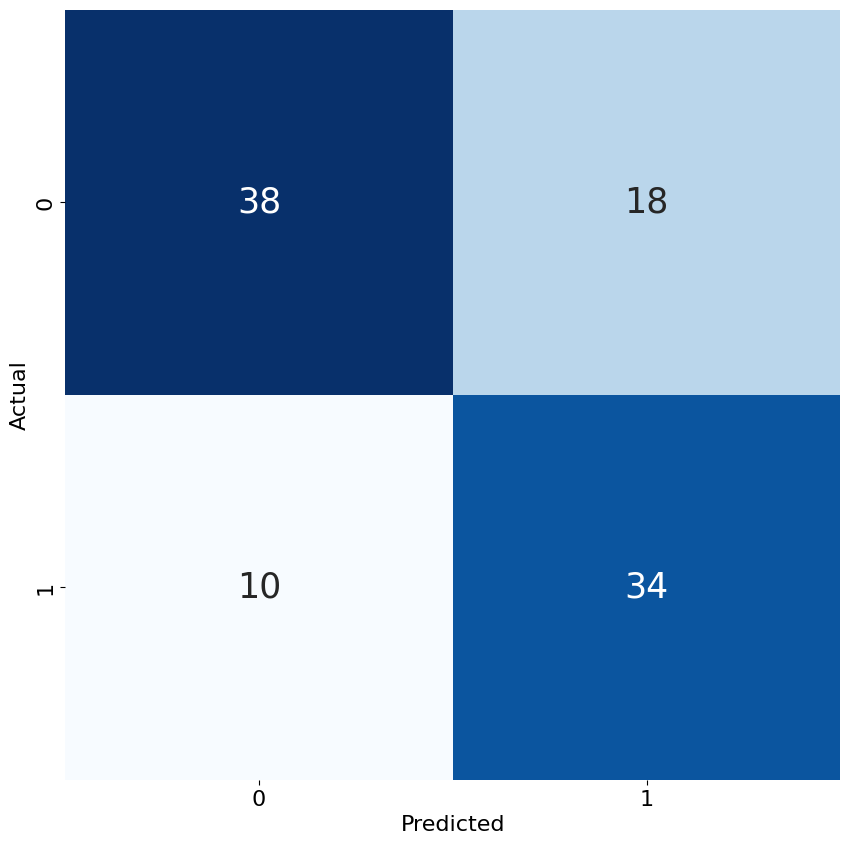

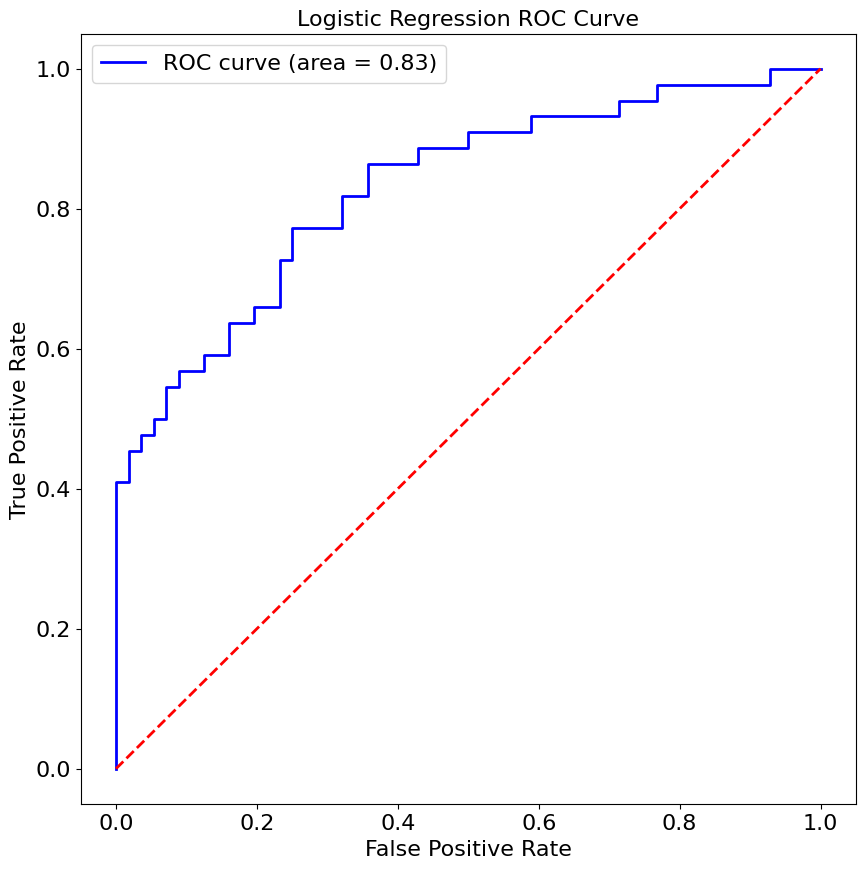

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('F1 score: ', f1_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('ROC AUC: ', roc_auc_score(y_test, y_pred))

plt.figure(figsize=(10, 10))
sbn.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"fontsize":25})
plt.xlabel('Predicted',fontsize=16)
plt.ylabel('Actual',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig(f'figs/LG_ConfusionMatrix.pdf')
plt.show()

y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Logistic Regression ROC Curve', fontsize=16)
plt.legend(loc='upper left', fontsize=16)
plt.savefig('figs/LG_ROC_AUC_curve.pdf')
plt.show()

# Naive Bayes

Accuracy:  0.7
F1 score:  0.6938775510204083
Precision:  0.6296296296296297
Recall:  0.7727272727272727
ROC AUC:  0.7077922077922078


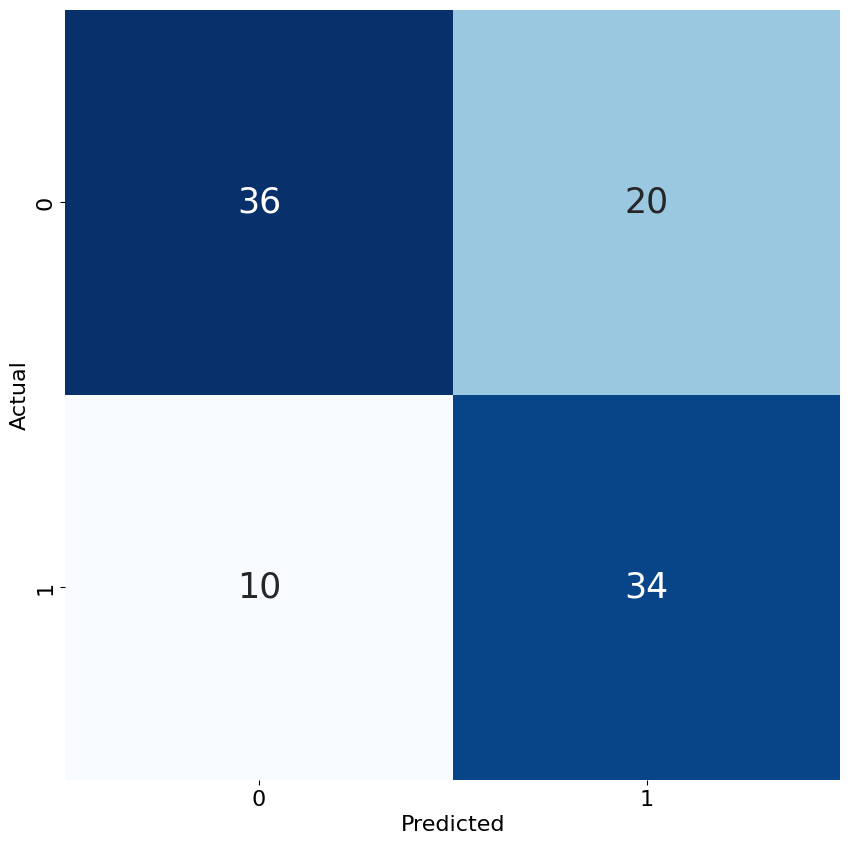

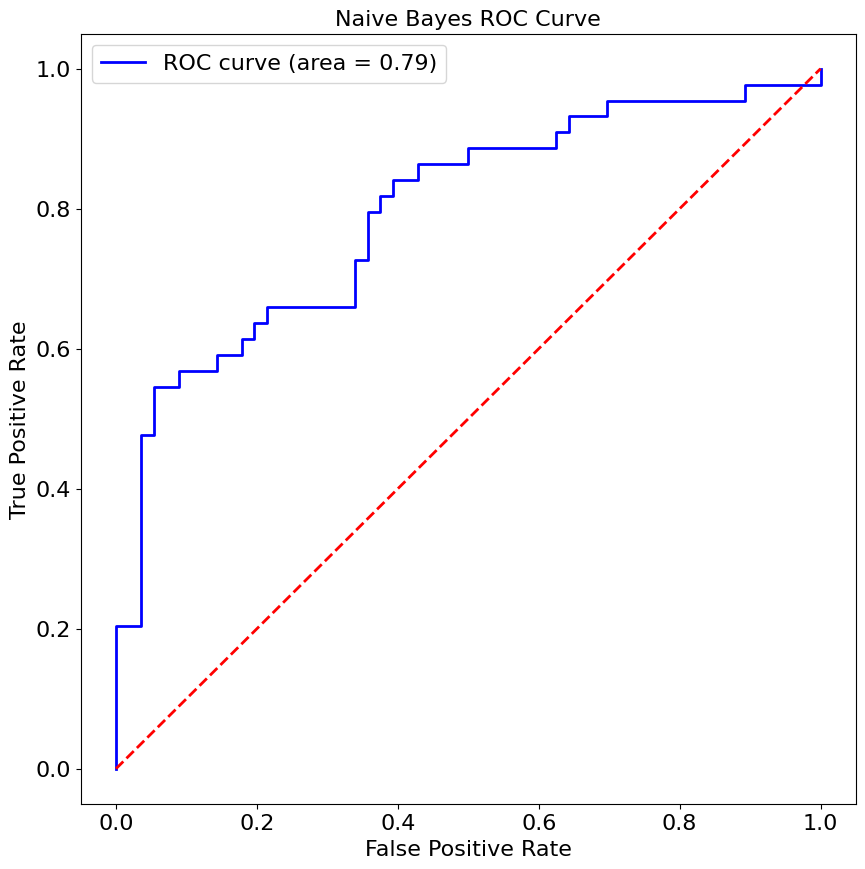

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('F1 score: ', f1_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('ROC AUC: ', roc_auc_score(y_test, y_pred))

plt.figure(figsize=(10, 10))
sbn.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"fontsize":25})
plt.xlabel('Predicted',fontsize=16)
plt.ylabel('Actual',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig(f'figs/NB_ConfusionMatrix.pdf')
plt.show()


y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Naive Bayes ROC Curve', fontsize=16)
plt.legend(loc='upper left', fontsize=16)
plt.savefig('figs/NB_ROC_AUC_curve.pdf')
plt.show()

# SVC

Accuracy:  0.72
F1 score:  0.688888888888889
Precision:  0.6739130434782609
Recall:  0.7045454545454546
ROC AUC:  0.7183441558441559


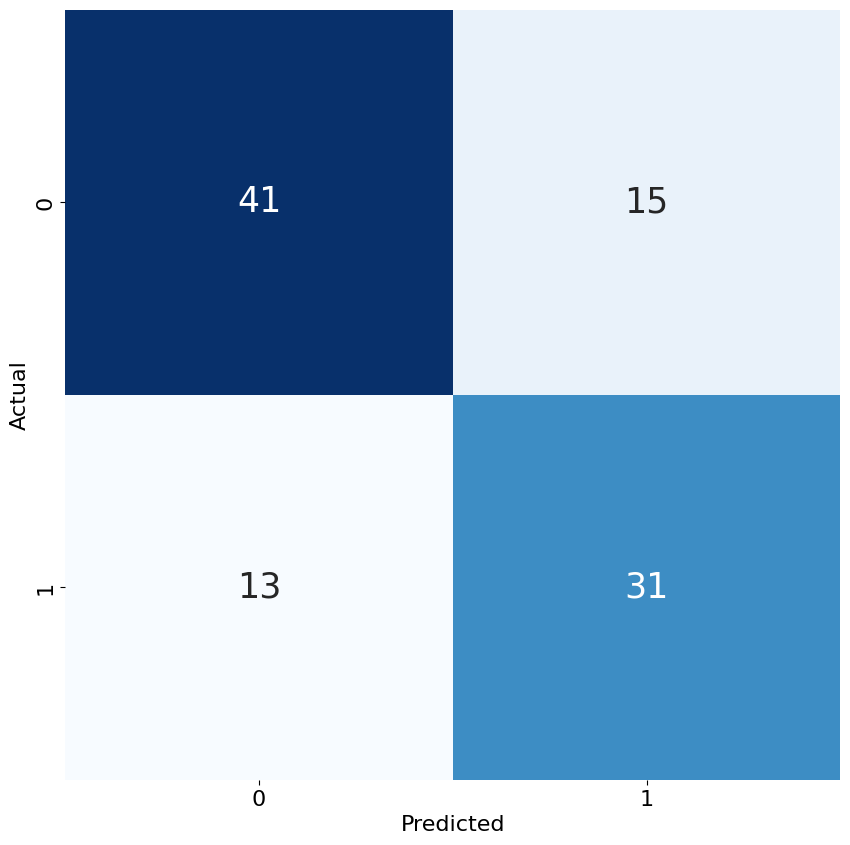

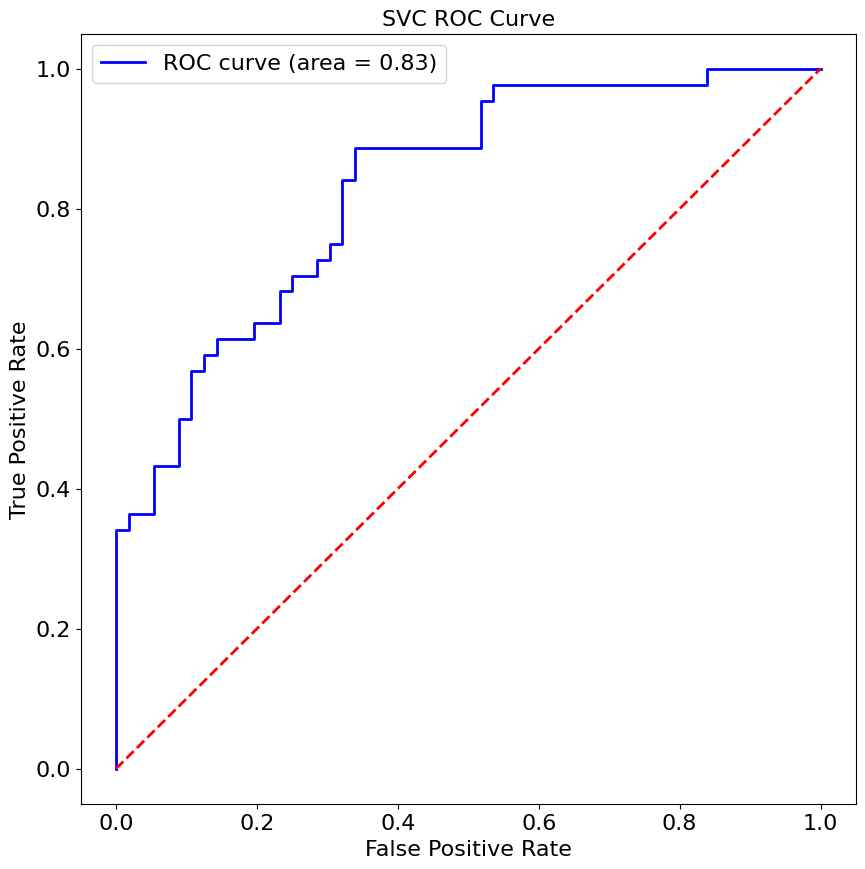

In [ ]:
model = SVC(probability=True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('F1 score: ', f1_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('ROC AUC: ', roc_auc_score(y_test, y_pred))

plt.figure(figsize=(10, 10))
sbn.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"fontsize":25})
plt.xlabel('Predicted',fontsize=16)
plt.ylabel('Actual',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig(f'figs/SVC_ConfusionMatrix.pdf')
plt.show()

y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVC ROC Curve', fontsize=16)
plt.legend(loc='upper left', fontsize=16)
plt.savefig('figs/SVC_ROC_AUC_curve.pdf')
plt.show()

# Tree

Accuracy:  0.68
F1 score:  0.6444444444444444
Precision:  0.6304347826086957
Recall:  0.6590909090909091
ROC AUC:  0.6777597402597403


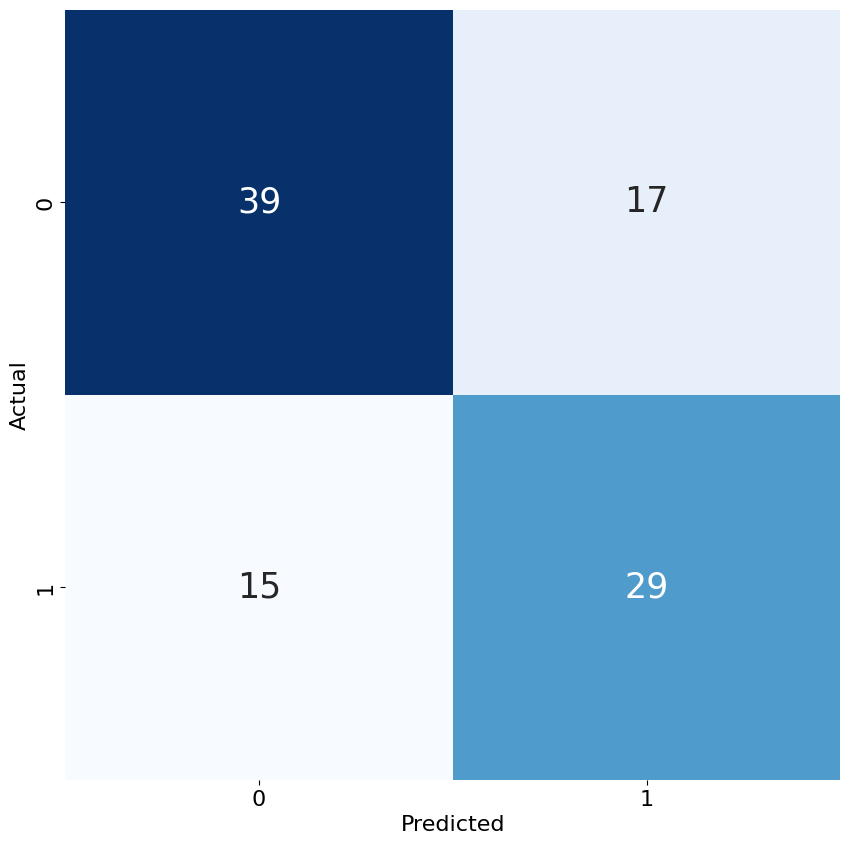

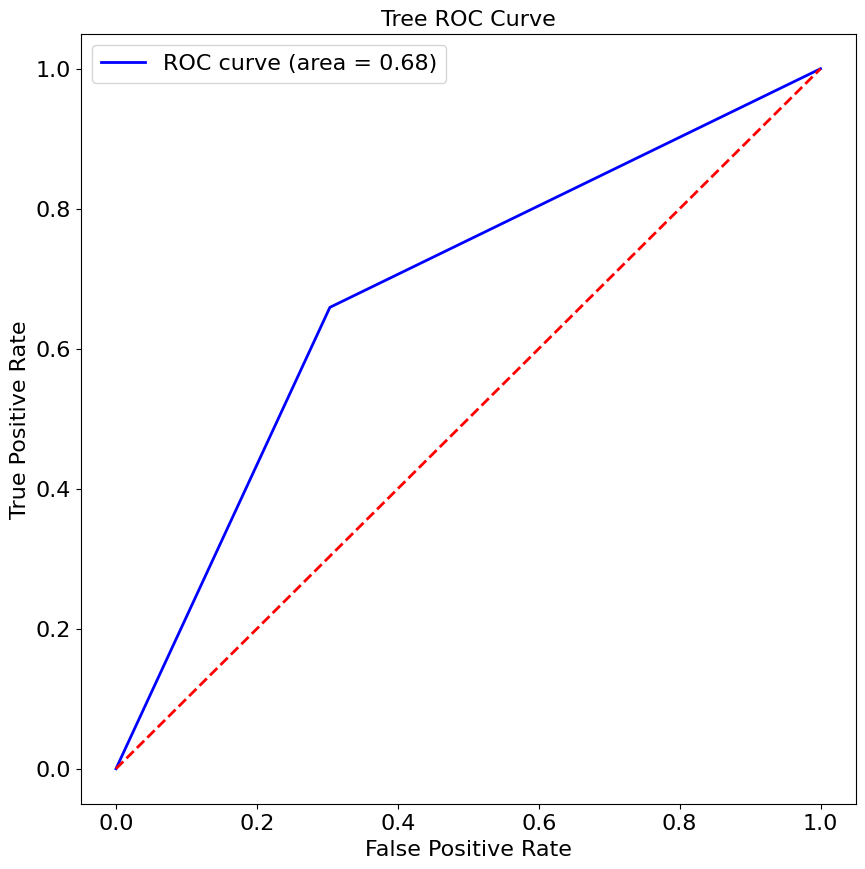

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('F1 score: ', f1_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('ROC AUC: ', roc_auc_score(y_test, y_pred))

plt.figure(figsize=(10, 10))
sbn.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"fontsize":25})
plt.xlabel('Predicted',fontsize=16)
plt.ylabel('Actual',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig(f'figs/Tree_ConfusionMatrix.pdf')
plt.show()

y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Tree ROC Curve', fontsize=16)
plt.legend(loc='upper left', fontsize=16)
plt.savefig('figs/Tree_ROC_AUC_curve.pdf')
plt.show()

# KNN

k = 2 --> accuracy ~ 71.0%
k = 3 --> accuracy ~ 71.0%
k = 4 --> accuracy ~ 70.0%
k = 5 --> accuracy ~ 78.0%
k = 6 --> accuracy ~ 74.0%
k = 7 --> accuracy ~ 74.0%
k = 8 --> accuracy ~ 69.0%
k = 9 --> accuracy ~ 67.0%
k = 10 --> accuracy ~ 66.0%


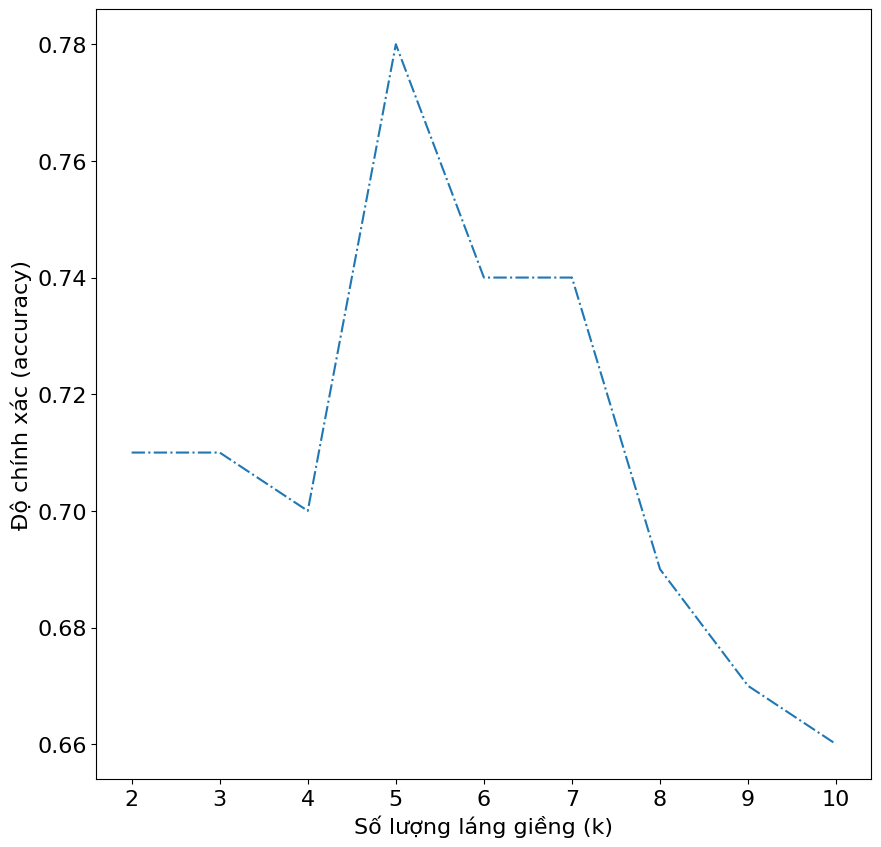

In [ ]:
## Phân tích giá trị của k theo chỉ số accuracy
list_k   = []
list_acc = []

for k in range(2, int(pow(X_train.shape[0], 1/2) / 2) + 2):
    list_k.append(k)

    neigh = KNeighborsClassifier(n_neighbors = k)
    neigh.fit(X_train, y_train)

    y_pred   = neigh.predict(X_test)
    acc      = accuracy_score(y_test, y_pred)
    list_acc.append(acc)
    print(f'k = {k:d} --> accuracy ~ {acc * 100:.1f}%')

## Biểu diễn trực quan dữ liệu phân tích giá trị k
plt.figure(figsize=(10, 10))
plt.plot(list_k, list_acc,linestyle='-.')
plt.xlabel('Số lượng láng giềng (k)', fontsize = 16)
plt.ylabel('Độ chính xác (accuracy)', fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.savefig('figs/KNN_grid_search.pdf')
plt.show()

Accuracy:  0.78
F1 score:  0.7441860465116279
Precision:  0.7619047619047619
Recall:  0.7272727272727273
ROC AUC:  0.7743506493506493


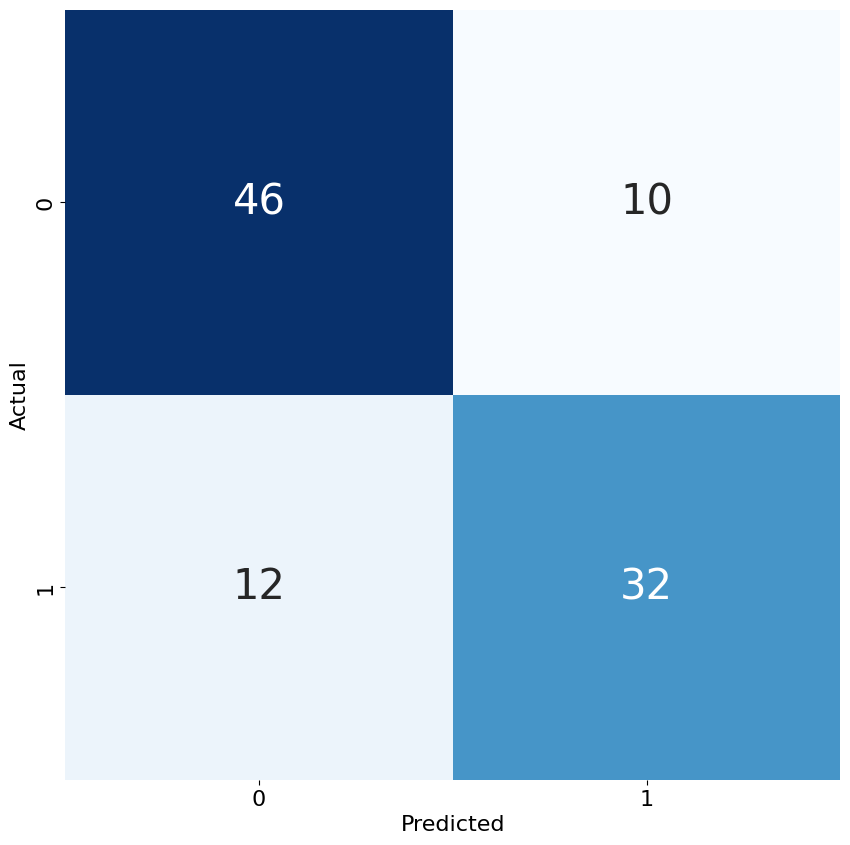

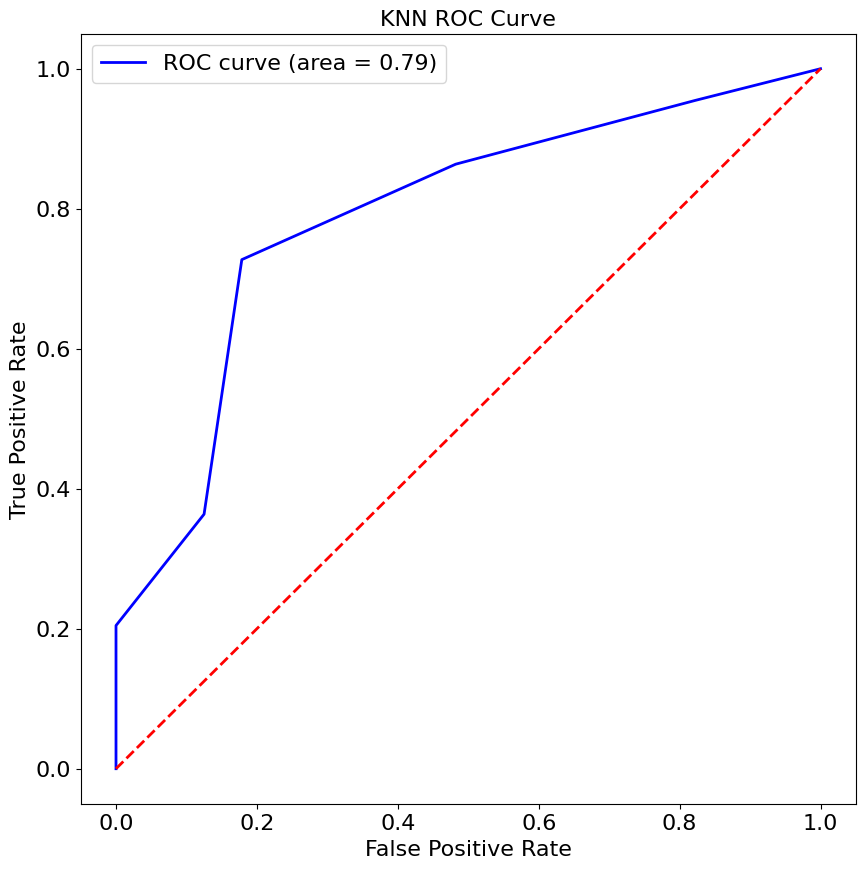

In [ ]:
k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('F1 score: ', f1_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('ROC AUC: ', roc_auc_score(y_test, y_pred))

plt.figure(figsize=(10, 10))
sbn.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"fontsize":30})
plt.xlabel('Predicted',fontsize=16)
plt.ylabel('Actual',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig(f'figs/KNN_ConfusionMatrix.pdf')
plt.show()

y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('KNN ROC Curve', fontsize=16)
plt.legend(loc='upper left', fontsize=16)
plt.savefig('figs/KNN_ROC_AUC_curve.pdf')
plt.show()

In [ ]:
!zip -r figs.zip figs
from google.colab import files
files.download('figs.zip')

updating: figs/ (stored 0%)
updating: figs/LG_ROC_AUC_curve.pdf (deflated 33%)
updating: figs/KNN_grid_search.pdf (deflated 33%)
updating: figs/LG_ConfusionMatrix.pdf (deflated 35%)
updating: figs/SVC_ROC_AUC_curve.pdf (deflated 33%)
updating: figs/Tree_ROC_AUC_curve.pdf (deflated 34%)
updating: figs/KNN_ConfusionMatrix.pdf (deflated 35%)
updating: figs/NB_ConfusionMatrix.pdf (deflated 35%)
updating: figs/NB_ROC_AUC_curve.pdf (deflated 33%)
updating: figs/SVC_ConfusionMatrix.pdf (deflated 36%)
updating: figs/KNN_ROC_AUC_curve.pdf (deflated 34%)
updating: figs/Tree_ConfusionMatrix.pdf (deflated 35%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>